# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.154032e+01     7.035389e+00
 * time: 0.0034890174865722656
     1     2.990774e+01     6.826735e+00
 * time: 0.011021137237548828
     2     1.671602e+01     4.176356e+00
 * time: 0.03329110145568848
     3     1.290700e+01     1.796388e+00
 * time: 0.05223512649536133
     4     1.146754e+01     1.730956e+00
 * time: 0.11921095848083496
     5     1.069708e+01     9.401942e-01
 * time: 0.13258004188537598
     6     1.024156e+01     1.320776e+00
 * time: 0.14689993858337402
     7     9.993472e+00     5.601402e-01
 * time: 0.16214299201965332
     8     9.872497e+00     8.038165e-01
 * time: 0.1773359775543213
     9     9.756129e+00     6.070043e-01
 * time: 0.19257593154907227
    10     9.617136e+00     3.964654e-01
 * time: 0.20712709426879883
    11     9.609325e+00     1.033095e+00
 * time: 0.21771502494812012
    12     9.519693e+00     7.930636e-01
 * time: 0.22776198387145996
    13     9.415163e+00     4.437226e-01
 * tim

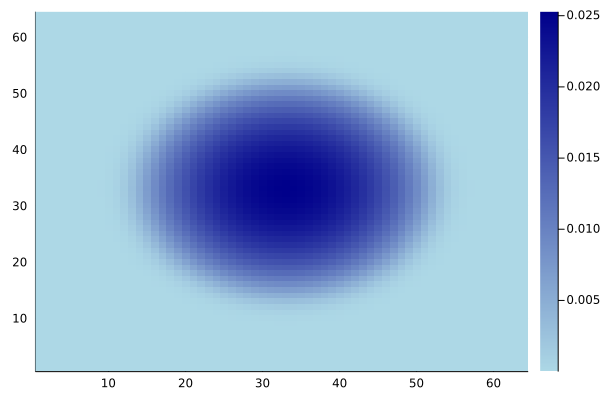

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)